## 1. A naive analysis

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Michele\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [355]:
df0 = pd.read_csv("lalonde.csv", index_col='id')
# It is unrealistic that a worker has 0 salary
df0 = df0[(df0['re78'] > 0) | (df0['re74'] > 0) | (df0['re75'] > 0)]
df = df0[df0['re78'] > 0]

In [356]:
len(df)

471

In [357]:
control = df[df['treat'] == 0].drop('treat', 1)
treat = df[df['treat'] == 1].drop('treat', 1)

 The data is not normally distributed since it's asymmetric. It is however positively skewed as shown in the boxplot and histograms. The QQ plots show a significant deviation from normality in the right tail (and also in the left tail, but that is trivial because the salary cannot be negative). This might hint to a power law since it is rare that workers have very high salaries but not so rare. Also, we noticed that the control group is more than twice than the treatment group

By comparison, we observe that the training has been mostly effective with workers with medium wage (< 2000). Indeed, the average salary increased of around 21%, from around 930 to 1150. In a similar fashion, medium-high salaries (between 2000 and 4500) experienced a 10% increment. The treatment was less effective with higher salaries.

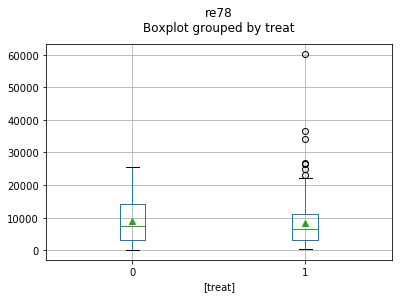

In [365]:
def boxplots(df, attr):
    proc_df = df[df[attr] > 0]
    ax = proc_df[['treat', attr]].boxplot(by='treat', showmeans=True)
    ttl = ax.title
    ttl.set_position([.5, 1.1])

boxplots(df, 're78')

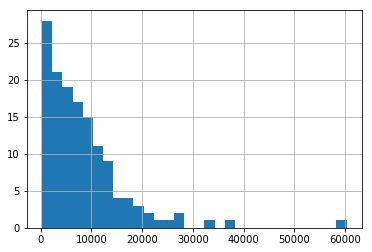

In [366]:
treat['re78'].hist(bins=30)

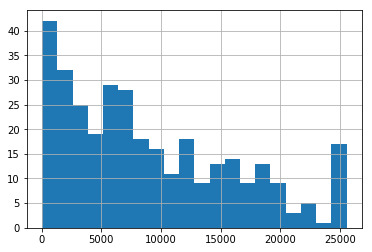

In [367]:
control['re78'].hist(bins=20)

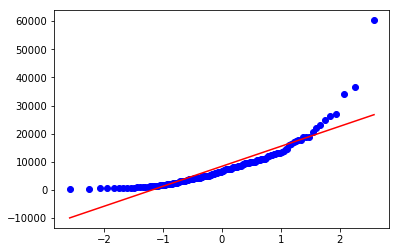

In [368]:
stats.probplot(treat['re78'], dist="norm", plot=matplotlib.pyplot)
plt.show()

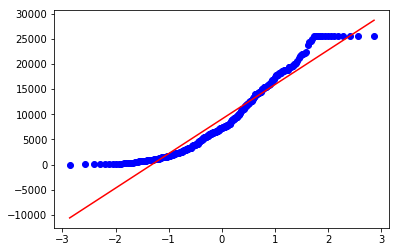

In [369]:
stats.probplot(control['re78'], dist="norm", plot=matplotlib.pyplot)
plt.show()

In [370]:
control[['re78']].describe()

,re78
count,331.000000
mean,9051.990391
std,7087.340468
min,31.032260
25%,2978.358000
50%,7310.313000
75%,14131.500000
max,25564.670000


In [371]:
treat[['re78']].describe()

,re78
count,140.000000
mean,8389.939665
std,8042.944693
min,289.789900
25%,3167.353750
50%,6504.144500
75%,11017.730000
max,60307.930000


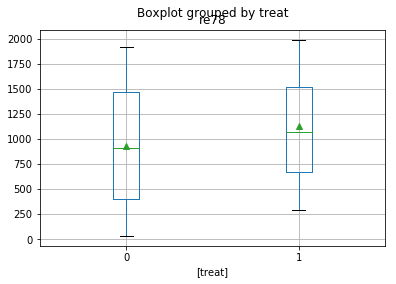

In [372]:
df[df['re78'] < 2000][['treat', 're78']].boxplot(by='treat', showmeans=True)

## 2. A closer look at the data

As shown in the boxplots, the distribution of each feature is similar for both groups (with the exception of 'age', for which the treatment group has a slighlty lower average). This reflects the fact that subjects were offered a job training experience randomly. The histograms show that the salaries and the age are skewed distributions, indeed their qq-plots are arched with respect to the normal distribution. The feature 'education' seems to be close to a normal distribution on the other hand.

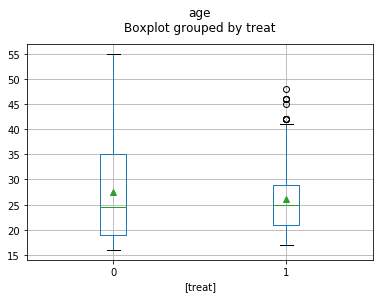

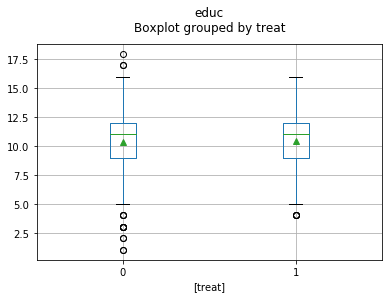

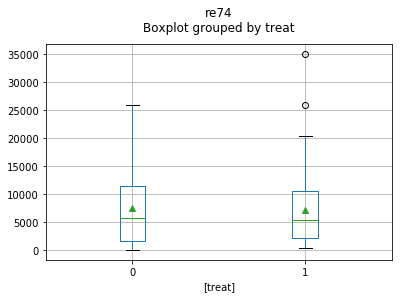

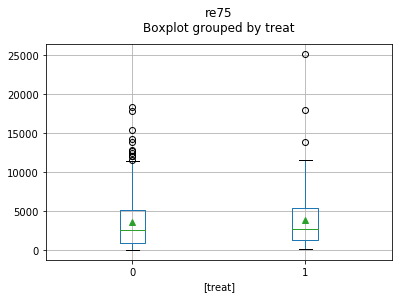

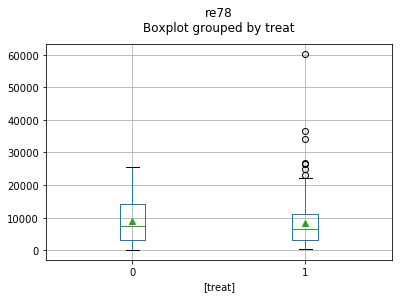

In [373]:
df = df0[['treat', 'age', 'educ', 're74', 're75', 're78']]
treat = df[df['treat'] == 1].drop('treat', 1)
control = df[df['treat'] == 0].drop('treat', 1)
for col in df.drop('treat', 1).columns:
    boxplots(df, col)

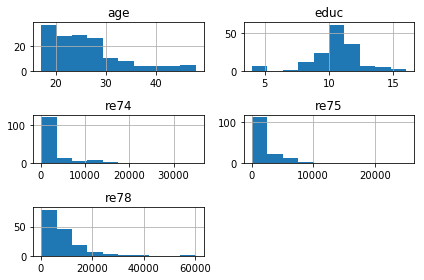

In [374]:
treat.hist()
plt.tight_layout()

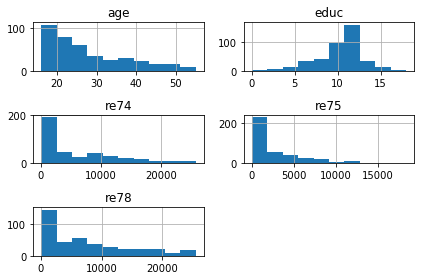

In [375]:
control.hist()
plt.tight_layout()

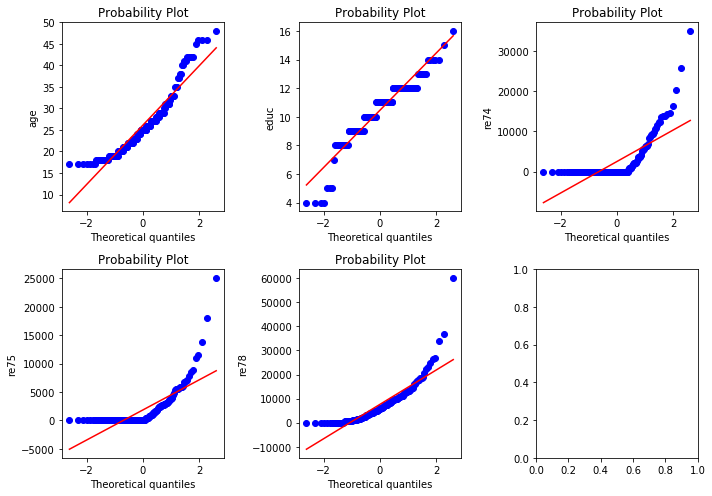

In [376]:
def qqPlots(df):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
    i = 0
    for col in df.columns:
        stats.probplot(df[col], dist="norm", plot=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_ylabel(col)
        i += 1
    plt.tight_layout()
    plt.show()

qqPlots(treat)

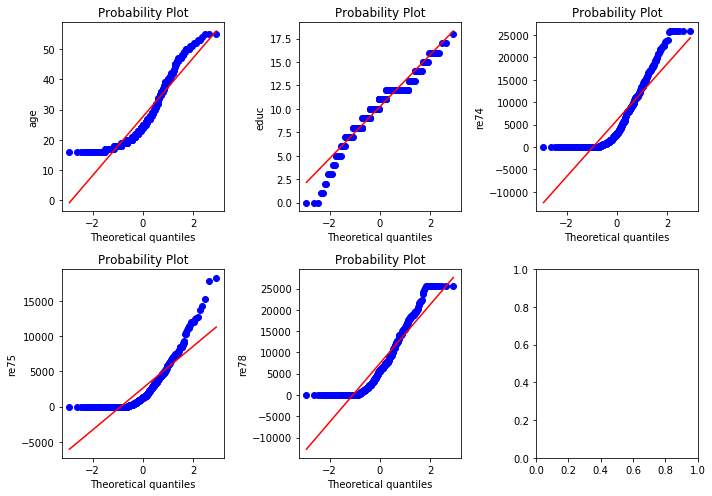

In [377]:
qqPlots(control)

In [350]:
# to do: use discrete fields. Power laws?
def describeDF(df):
    desc = pd.DataFrame()
    for col in df:
        desc[col] = df[df[col] > 0][col].describe()
    return desc

describeDF(treat)

,age,educ,re74,re75,re78
count,155.000000,155.000000,54.000000,74.000000,140.000000
mean,26.103226,10.451613,7179.280230,3830.138284,8389.939665
std,7.146132,2.058222,6761.279396,4147.208703,8042.944693
min,17.000000,4.000000,445.170400,74.343450,289.789900
25%,21.000000,9.000000,2155.779000,1228.986750,3167.353750
50%,25.000000,11.000000,5465.396500,2710.460000,6504.144500
75%,29.000000,12.000000,10474.869250,5428.879500,11017.730000
max,48.000000,16.000000,35040.070000,25142.240000,60307.930000


In [351]:
describeDF(control)

,age,educ,re74,re75,re78
count,404.000000,401.000000,317.000000,295.000000,331.000000
mean,27.606436,10.306733,7604.581897,3586.853648,9051.990391
std,10.263818,2.694101,6875.777757,3427.009132,7087.340468
min,16.000000,1.000000,33.307540,10.741940,31.032260
25%,19.000000,9.000000,1579.169000,963.193550,2978.358000
50%,24.500000,11.000000,5683.833000,2565.532000,7310.313000
75%,35.000000,12.000000,11516.570000,5177.613000,14131.500000
max,55.000000,18.000000,25862.320000,18347.230000,25564.670000
